In [1]:
import my_library.common_analysis_tools as ct
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts
import ROOT


Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()
ROOT.gStyle.SetOptStat(0)

In [3]:
def make_kkpi_histos(df_pipkmks, df_pimkpks, filter, nbins=60, xmin=1.0, xmax=1.6):
    hist_pipkmks = df_pipkmks.Histo1D((f'pipkmks_{filter}', f'pipkmks_{filter}', nbins, xmin, xmax), 'pipkmks_m')
    hist_pimkpks = df_pimkpks.Histo1D((f'pimkpks_{filter}', f'pimkpks_{filter}', nbins, xmin, xmax), 'pimkpks_m')
    hist_pipkmks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
    hist_pimkpks.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
    hist_pipkmks.SetTitle(f'M(KK#pi) GeV')
    hist_pipkmks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    hist_pipkmks.GetYaxis().SetTitle('Counts/10MeV')
    hist_pimkpks.SetTitle(f'M(KK#pi) for {filter}')
    hist_pimkpks.GetXaxis().SetTitle('M(KK#pi) [GeV]')
    return hist_pipkmks.GetValue(), hist_pimkpks.GetValue()

def build_legend(hist_pipkmks, hist_pimkpks):
    leg = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
    leg.AddEntry(hist_pipkmks, 'K^{-}K_{s}#pi^{+}', 'l')
    leg.AddEntry(hist_pimkpks, 'K^{+}K_{s}#pi^{-}', 'l')
    return leg

In [4]:
plot_path = '/work/halld/home/viducic/plots/acceptance_study'
data_type = 'signal'
run_period = 'spring'

In [5]:
df_pipkmks = ct.get_dataframe('pipkmks', run_period, data_type, filtered=False)
df_pimkpks = ct.get_dataframe('pimkpks', run_period, data_type, filtered=False)
c = ROOT.TCanvas()

In [6]:
n_flattened_pipkmks = df_pipkmks.Count().GetValue()
n_flattened_pimkpks = df_pimkpks.Count().GetValue()
print(f"N(flat) for {run_period} pi+K-: {n_flattened_pipkmks}")
print(f"N(flat) for {run_period} pi-K+: {n_flattened_pimkpks}")

N(flat) for spring pi+K-: 2174878
N(flat) for spring pi-K+: 1658096


In [7]:
df_pipkmks = df_pipkmks.Filter('pipkmks_m >= 1.0 && pipkmks_m <= 1.6')
df_pimkpks = df_pimkpks.Filter('pimkpks_m >= 1.0 && pimkpks_m <= 1.6')

In [8]:
n_uncut_pipkmks = df_pipkmks.Count().GetValue()
n_uncut_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_uncut, hist_pimkpks_uncut = make_kkpi_histos(df_pipkmks, df_pimkpks, 'uncut')

uncut pipkmks: 2162011 || uncut pimkpks: 1649082


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_uncut.png has been created


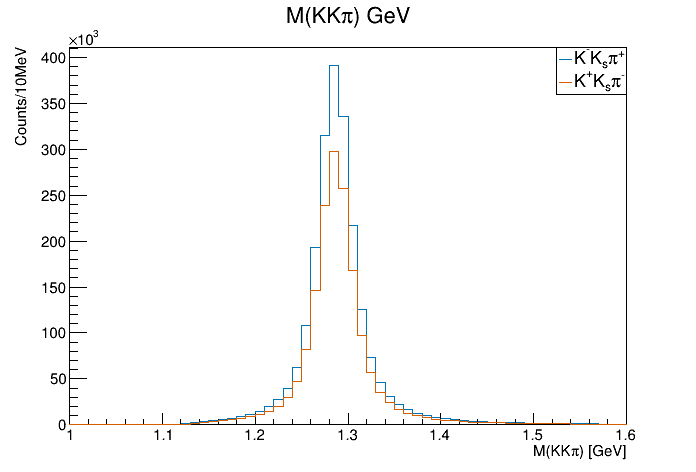

In [9]:
print(f'uncut pipkmks: {n_uncut_pipkmks} || uncut pimkpks: {n_uncut_pimkpks}')
hist_pipkmks_uncut.Draw()
hist_pimkpks_uncut.Draw('same')
legend = build_legend(hist_pipkmks_uncut, hist_pimkpks_uncut)
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_uncut.png')


In [10]:
df_pipkmks = df_pipkmks.Filter(kcuts.MX2_PPIPKMKS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.MX2_PPIMKPKS_CUT)
n_mx2all_pipkmks = df_pipkmks.Count().GetValue()
n_mx2all_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_mx2all, hist_pimkpks_mx2all = make_kkpi_histos(df_pipkmks, df_pimkpks, 'mx2all')

mx2 all cut pipkmks: 1977675 || pimkpks: 1510397
mx2 all efficiency pipkmks: 0.9147386391651107 || pimkpks: 0.9159016956100424


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_mx2all.png has been created


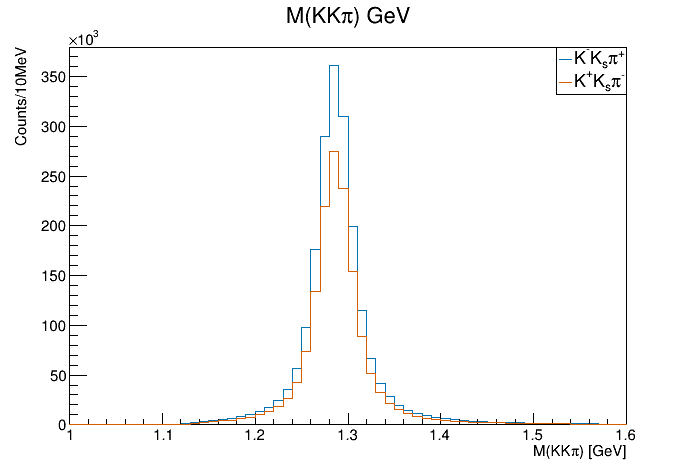

In [11]:
print(f'mx2 all cut pipkmks: {n_mx2all_pipkmks} || pimkpks: {n_mx2all_pimkpks}')
print(f'mx2 all efficiency pipkmks: {n_mx2all_pipkmks/n_uncut_pipkmks} || pimkpks: {n_mx2all_pimkpks/n_uncut_pimkpks}')
hist_pipkmks_mx2all.Draw()
hist_pimkpks_mx2all.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_mx2all.png')

In [12]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_PATHLENGTH_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_PATHLENGTH_CUT)
n_kspl_pipkmks = df_pipkmks.Count().GetValue()
n_kspl_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kspl, hist_pimkpks_kspl = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kspl')



palthlength filtered pipkmks: 1452783 || pathlength filtered pimkpks: 1109429
cut efficiency pipkmks = 0.7345913762372482 || cut efficiency pimkpks = 0.7345280744069275


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_kspl.png has been created


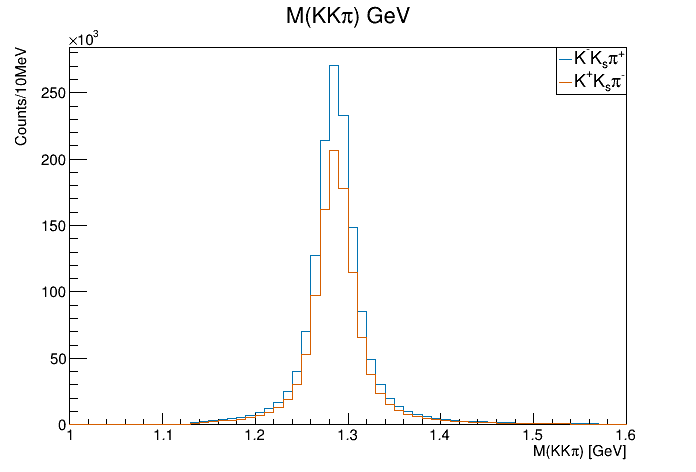

In [13]:
print(f'palthlength filtered pipkmks: {n_kspl_pipkmks} || pathlength filtered pimkpks: {n_kspl_pimkpks}')
print(f'cut efficiency pipkmks = {n_kspl_pipkmks/n_mx2all_pipkmks} || cut efficiency pimkpks = {n_kspl_pimkpks/n_mx2all_pimkpks}')
hist_pipkmks_kspl.Draw()
hist_pimkpks_kspl.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_kspl.png')


In [14]:
df_pipkmks = df_pipkmks.Filter(kcuts.KS_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KS_MASS_CUT)
n_ksm_pipkmks = df_pipkmks.Count().GetValue()
n_ksm_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_ksm, hist_pimkpks_ksm = make_kkpi_histos(df_pipkmks, df_pimkpks, 'ks_m_cut')

kshort mass cut pipkmks: 1356727 || kshort mass cut pimkpks: 1036363
kshort mass cut efficiency pipkmks: 0.9338813849005667 || pimkpks 0.9341408959023065


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_ksmass.png has been created


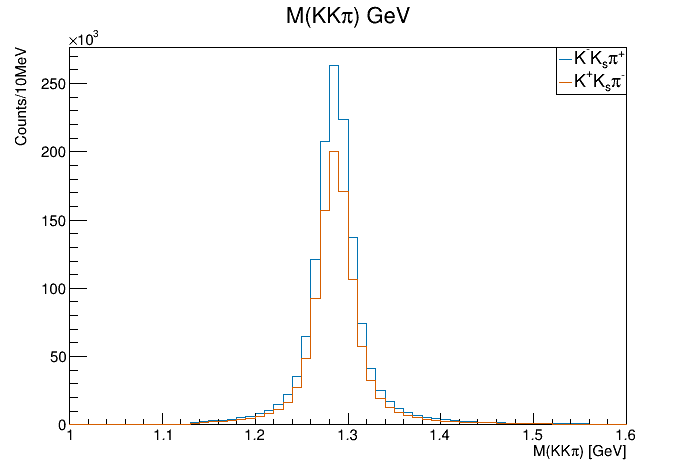

In [15]:
print(f'kshort mass cut pipkmks: {n_ksm_pipkmks} || kshort mass cut pimkpks: {n_ksm_pimkpks}')
print(f'kshort mass cut efficiency pipkmks: {n_ksm_pipkmks / n_kspl_pipkmks} || pimkpks {n_ksm_pimkpks / n_kspl_pimkpks}')
hist_pipkmks_ksm.Draw()
hist_pimkpks_ksm.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_ksmass.png')

In [16]:
df_pipkmks = df_pipkmks.Filter(kcuts.P_P_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.P_P_CUT)
n_pp_pipkmks = df_pipkmks.Count().GetValue()
n_pp_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_pp, hist_pimkpks_pp = make_kkpi_histos(df_pipkmks, df_pimkpks, 'pp')

proton momentum cut pipkmks: 1190165 || pimkpks: 910351
proton momentum cut efficiency pipkmks: 0.8772324867125074 || pimkpks: 0.8784093990233152


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_pp.png has been created


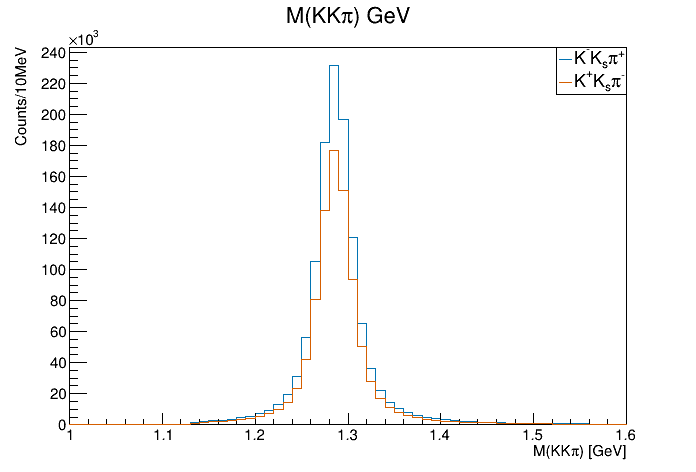

In [17]:
print(f'proton momentum cut pipkmks: {n_pp_pipkmks} || pimkpks: {n_pp_pimkpks}')
print(f'proton momentum cut efficiency pipkmks: {n_pp_pipkmks/n_ksm_pipkmks} || pimkpks: {n_pp_pimkpks/n_ksm_pimkpks}')
hist_pipkmks_pp.Draw()
hist_pimkpks_pp.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_pp.png')

In [18]:
df_pipkmks = df_pipkmks.Filter(kcuts.PPIP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.PPIM_MASS_CUT)
n_ppi_pipkmks = df_pipkmks.Count().GetValue()
n_ppi_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_ppi, hist_pimkpks_ppi = make_kkpi_histos(df_pipkmks, df_pimkpks, 'ppi')

n ppi cut pipkmks: 1082554 || pimkpks: 827959
ppi cut efficicnecy pipkmks: 0.9095831250288825 || pimkpks: 0.9094942500200472


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_delta_nstar.png has been created


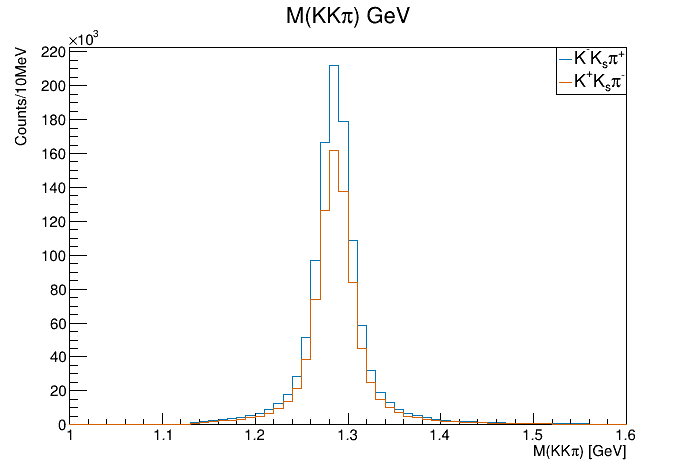

In [19]:
print(f'n ppi cut pipkmks: {n_ppi_pipkmks} || pimkpks: {n_ppi_pimkpks}')
print(f'ppi cut efficicnecy pipkmks: {n_ppi_pipkmks / n_pp_pipkmks} || pimkpks: {n_ppi_pimkpks / n_pp_pimkpks}')
hist_pipkmks_ppi.Draw()
hist_pimkpks_ppi.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_delta_nstar.png')

In [20]:
df_pipkmks = df_pipkmks.Filter(kcuts.KMP_MASS_CUT)
df_pimkpks = df_pimkpks.Filter(kcuts.KSP_MASS_CUT)
n_kmp_pipkmks = df_pipkmks.Count().GetValue()
n_ksp_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kp, hist_pimkpks_kp = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kp')

n kp cut pipkmks: 1077862 || pimkpks: 824418
kp cut efficiency pipkmks: 0.9956658051238091 || pimkpks: 0.9957232181786779


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_lambda.png has been created


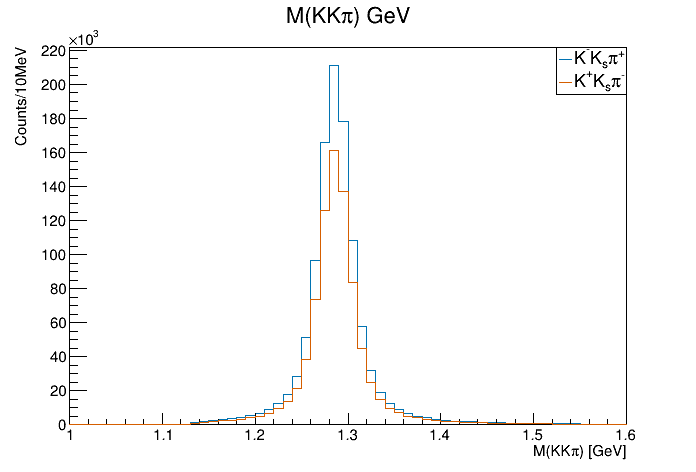

In [21]:
print(f'n kp cut pipkmks: {n_kmp_pipkmks} || pimkpks: {n_ksp_pimkpks}')
print(f'kp cut efficiency pipkmks: {n_kmp_pipkmks/n_ppi_pipkmks} || pimkpks: {n_ksp_pimkpks/n_ppi_pimkpks}')
hist_pipkmks_kp.Draw()
hist_pimkpks_kp.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_lambda.png')

In [22]:
df_pipkmks = df_pipkmks.Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_pimkpks = df_pimkpks.Filter(kcuts.KSTAR_ALL_CUT_PIMKPKS)
n_kstar_pipkmks = df_pipkmks.Count().GetValue()
n_kstar_pimkpks = df_pimkpks.Count().GetValue()
hist_pipkmks_kstar, hist_pimkpks_kstar = make_kkpi_histos(df_pipkmks, df_pimkpks, 'kstar')

kstar cut pipkmks: 1019763 || pimkpks: 778799
kstar efficiency: 0.9460979234818557 || pimkpks: 0.9446652062424644


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_kstar.png has been created


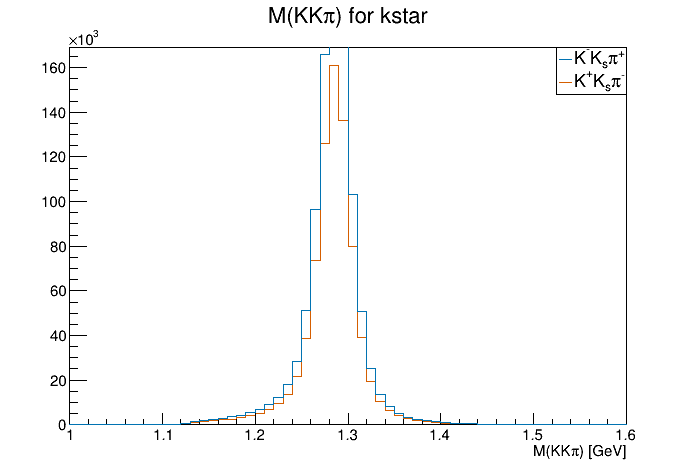

In [23]:
print(f'kstar cut pipkmks: {n_kstar_pipkmks} || pimkpks: {n_kstar_pimkpks}')
print(f'kstar efficiency: {n_kstar_pipkmks/n_kmp_pipkmks} || pimkpks: {n_kstar_pimkpks/n_ksp_pimkpks}')
hist_pimkpks_kstar.Draw()
hist_pipkmks_kstar.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_kstar.png')

total efficiency pipkmks: 0.47167336336401616 || pimkpks: 0.4722621434228256


Info in <TCanvas::Print>: png file /work/halld/home/viducic/plots/acceptance_study/signal_spring_kkpi_total_eff.png has been created


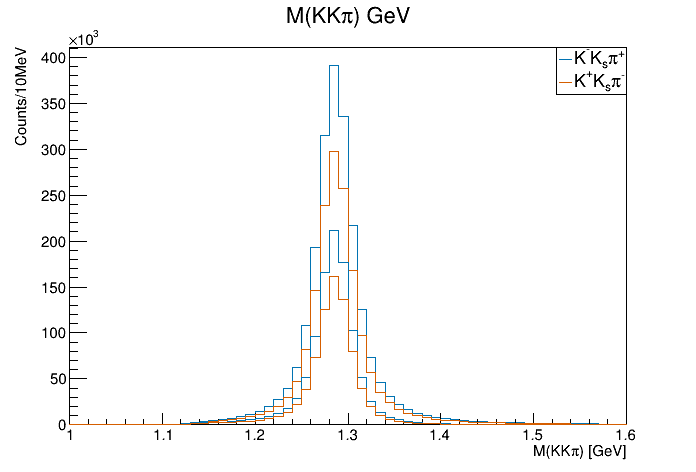

In [24]:
print(f'total efficiency pipkmks: {n_kstar_pipkmks/n_uncut_pipkmks} || pimkpks: {n_kstar_pimkpks/n_uncut_pimkpks}')
hist_pipkmks_uncut.Draw()
hist_pimkpks_uncut.Draw('same')
hist_pipkmks_kstar.Draw('same')
hist_pimkpks_kstar.Draw('same')
legend.Draw()
c.Draw()
c.SaveAs(f'{plot_path}/{data_type}_{run_period}_kkpi_total_eff.png')